Rum Yue

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
raw = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [54]:
train = raw.copy()

In [61]:
train.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01
7,1417412400,300.0,300.0,300.0,300.0,0.010000,3.00000,300.0,2014-12-01
51,1417415040,370.0,370.0,370.0,370.0,0.010000,3.70000,370.0,2014-12-01
77,1417416600,370.0,370.0,370.0,370.0,0.026556,9.82555,370.0,2014-12-01
1436,1417498140,377.0,377.0,377.0,377.0,0.010000,3.77000,377.0,2014-12-02


In [56]:
# notice the feature of 'Timestamp'
# apply unit = 's' to transform current timestamp into correct date 
train['date'] = pd.to_datetime(train['Timestamp'], unit = 's').dt.date

In [59]:
train = train.dropna()

In [62]:
gp = train.groupby('date')

In [66]:
real_price = gp['Weighted_Price'].mean()

In [65]:
gp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,date
0,1417411980,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,2014-12-01
7,1417412400,300.00,300.00,300.00,300.00,0.010000,3.000000,300.000000,2014-12-01
51,1417415040,370.00,370.00,370.00,370.00,0.010000,3.700000,370.000000,2014-12-01
77,1417416600,370.00,370.00,370.00,370.00,0.026556,9.825550,370.000000,2014-12-01
1436,1417498140,377.00,377.00,377.00,377.00,0.010000,3.770000,377.000000,2014-12-02
1766,1417517940,377.75,378.00,377.75,378.00,4.000000,1511.937500,377.984375,2014-12-02
1771,1417518240,378.00,378.00,378.00,378.00,4.900000,1852.200000,378.000000,2014-12-02
1772,1417518300,378.00,378.00,378.00,378.00,5.200000,1965.600000,378.000000,2014-12-02
2230,1417545780,378.00,378.00,378.00,378.00,0.100000,37.800000,378.000000,2014-12-02
2882,1417584900,377.90,377.90,377.90,377.90,0.010000,3.779000,377.900000,2014-12-03


In [122]:
# we make predictions 30 days ahead
pred_days = 30
new_train = real_price[:len(real_price) - pred_days]
new_test = real_price[len(real_price) - pred_days:]

In [69]:
real_price.shape

(1465,)

In [83]:
# data preprocessing
traindata = new_train.values

In [84]:
traindata = traindata.reshape(-1, 1)

In [85]:
traindata.shape

(1435, 1)

In [88]:
from sklearn.preprocessing import MinMaxScaler
msc = MinMaxScaler()

In [89]:
traindata = msc.fit_transform(traindata)
X_train = traindata[0: len(traindata) - 1]
y_train = traindata[1: len(traindata)]

In [92]:
# let X set be 3D to prepare for rnn fit form
X_train = np.reshape(X_train, (len(X_train), 1, 1))
# X_train are required to be 3d when y_train needs to be 2d

Setting the RNN network

In [94]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [97]:
md = Sequential()

In [98]:
md.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
md.add(Dense(units = 1))
md.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [99]:
md.fit(X_train, y_train, batch_size = 5, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1434/1434 [==============================] - 1s 673us/step - loss: 0.0395
Epoch 2/100
1434/1434 [==============================] - 0s 311us/step - loss: 0.0352
Epoch 3/100
1434/1434 [==============================] - 0s 309us/step - loss: 0.0313
Epoch 4/100
1434/1434 [==============================] - 0s 305us/step - loss: 0.0272
Epoch 5/100
1434/1434 [==============================] - 0s 305us/step - loss: 0.0229
Epoch 6/100
1434/1434 [==============================] - 0s 324us/step - loss: 0.0182
Epoch 7/100
1434/1434 [==============================] - 0s 339us/step - loss: 0.0136
Epoch 8/100
1434/1434 [==============================] - 0s 319us/step - loss: 0.0093
Epoch 9/100
1434/1434 [==============================] - 0s 313us/step - loss: 0.0057
Epoch 10/100
1434/1434 [==============================] - 0s 318us/step - loss: 0.0031
Epoch 11/100
1434/1434 [==============================] - 0s 312us/step - loss: 0.0015
Epoc

1434/1434 [==============================] - 0s 345us/step - loss: 1.4837e-04
Epoch 89/100
1434/1434 [==============================] - 0s 330us/step - loss: 1.5033e-04
Epoch 90/100
1434/1434 [==============================] - 0s 331us/step - loss: 1.4565e-04
Epoch 91/100
1434/1434 [==============================] - 0s 315us/step - loss: 1.4611e-04
Epoch 92/100
1434/1434 [==============================] - 0s 310us/step - loss: 1.4711e-04
Epoch 93/100
1434/1434 [==============================] - 0s 303us/step - loss: 1.5050e-04
Epoch 94/100
1434/1434 [==============================] - 0s 303us/step - loss: 1.4767e-04
Epoch 95/100
1434/1434 [==============================] - 0s 303us/step - loss: 1.5010e-04
Epoch 96/100
1434/1434 [==============================] - 0s 305us/step - loss: 1.4851e-04
Epoch 97/100
1434/1434 [==============================] - 0s 306us/step - loss: 1.4962e-04
Epoch 98/100
1434/1434 [==============================] - 0s 314us/step - loss: 1.5092e-04
Epoch 99/100

In [123]:
testdata = new_test.values

In [103]:
testdata = testdata.reshape(-1, 1)
testdata = msc.transform(testdata)
testdata = np.reshape(testdata, (len(testdata), 1, 1))

In [105]:
pred_BTC = md.predict(testdata)
pred_BTC = msc.inverse_transform(pred_BTC)

#### Visualize the prediction

In [125]:
new_test = new_test.reset_index()

In [126]:
x = new_test.index

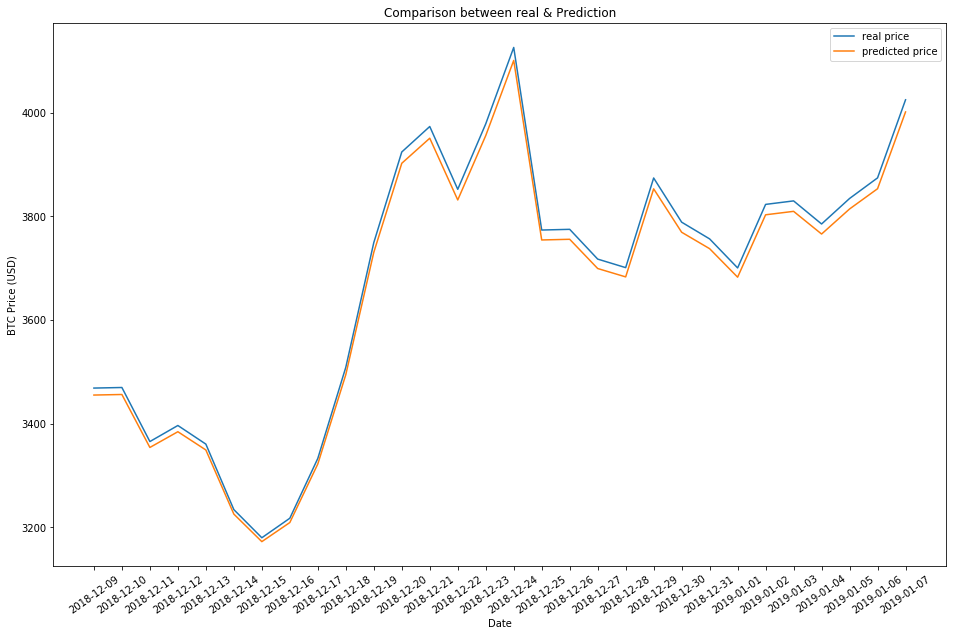

In [127]:
plt.figure(figsize = (16, 10))
plt.plot(testdata, label = 'real price')
plt.plot(pred_BTC, label = 'predicted price')
plt.title('Comparison between real & Prediction')
lb = new_test['date']
plt.xticks(x, lb, rotation = 35)
plt.xlabel('Date')
plt.ylabel('BTC Price (USD)')

plt.legend()
plt.show()

In [128]:
## cannot understand the usage of LSTM: even in test set we still need test data to predict 

### TO BE CONTINUED